# Ownerships in Bogota, Colombia

The main goal of this inmersion is to generate a model which predicts the cost of an ownership in the different neighborhoods in Bogota, using the dataset called "inmuebles_bogota.csv" and the survey "Encuesta Multipropósito Bogotá-Cundinamarca-EM-2021".

## Importing and describing our data

### Importing libraries that will be used

In [391]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\inmuebles_bogota.csv")
data.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [392]:
data.shape

(9520, 8)

## We will try to answere the next questions:

Q1.- How many categories are in the "Type" column and how many ownerships are in each one?

Q2.- How many ownerships by neighborhood are in our dataset?

Q3.- Is there any outlayer in the columns "Rooms", "Bathrooms", "Area"?

Q4.- What is the mean cost/m2 for each neighborhood? 


### 1.- Knowing and cleaning data

In this section I will remove any possible errors I might get because of 

- strange characters

- wrong type of values

- Values that does not make sense

In [393]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


- It is clear that the characters "ñ" and "Á" might be problematic, so I will take them off.

In [394]:
data=data.rename(columns={"Área":"Area",
                          "Baños":"Bathrooms",
                          "Descripcion":"Description",
                          "Habitaciones":"Rooms",
                          "Barrio":"Neighborhood",
                          "Valor":"Cost",
                          "Tipo":"Type"})

data.Type=data.Type.str.replace("Casa", "House")
data.Type=data.Type.str.replace("Apartamento", "Department")
data.Type=data.Type.str.replace("Lote", "Lot")
data.Type=data.Type.str.replace("Finca", "Land property")
data.Type=data.Type.str.replace("Oficina/Consultorio", "Office")
data.Type=data.Type.str.replace("Bodega", "Cellar")
data.Type=data.Type.str.replace("Edificio", "Building")


- I will change the data type of "Cost" column, from object (string) to float and I will change the unit to millions

In [395]:
data["cost_millions"] = data.Cost.str.split(regex=True, expand = True )[1] # regex = read regular expresions and expand returns a DataFrame
# I take the second column of the dataframe generated by expand = True because there we have the cost, that column it still a string type
data.cost_millions = data.cost_millions.str.replace(".","")
data.cost_millions = data.cost_millions.astype("float64")/1e6 #after clean our cost number, we change the type of the column to float and convert it
#to millions

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_14516\3329334211.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.cost_millions = data.cost_millions.str.replace(".","")


In [396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           9520 non-null   object 
 1   Description    9520 non-null   object 
 2   Rooms          9520 non-null   int64  
 3   Bathrooms      9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Neighborhood   9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Cost           9520 non-null   object 
 8   cost_millions  9520 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 669.5+ KB


Now data types are right, I will check for unusual values depending of the columns

In [397]:
data.describe()

,Rooms,Bathrooms,Area,cost_millions
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


I just need two decimals, so I will change the display of the numbers

In [398]:
pd.set_option("display.precision",2) #round all math operations to just 2 decimals
pd.set_option("display.float_format",lambda x: "%.2f" %x) # show the values with two decimals
data.describe()

,Rooms,Bathrooms,Area,cost_millions
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


For example, I can see the max rooms number and check for the info, just in case it might be a data that do not correspond with the Area value

In [399]:
data[data.Rooms == data.Rooms.max()]

,Type,Description,Rooms,Bathrooms,Area,Neighborhood,UPZ,Cost,cost_millions
897,House,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,480.00


Also we can looking for the colums with the min area

In [400]:
data.query("Area == @data.Area.min()")

,Type,Description,Rooms,Bathrooms,Area,Neighborhood,UPZ,Cost,cost_millions
8401,Department,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,180.00


As we can see, the number of rooms might be wrong because it has the same value as Area, and is a home, so it is impossible to have 110 rooms in a house with 110 m2 area, also, there's no reason to have 3 rooms in an 2 m2 area.

### Q1.- How many categories are in the "Type" column and how many ownerships are in each one?

There are 8 types of ownerships: 


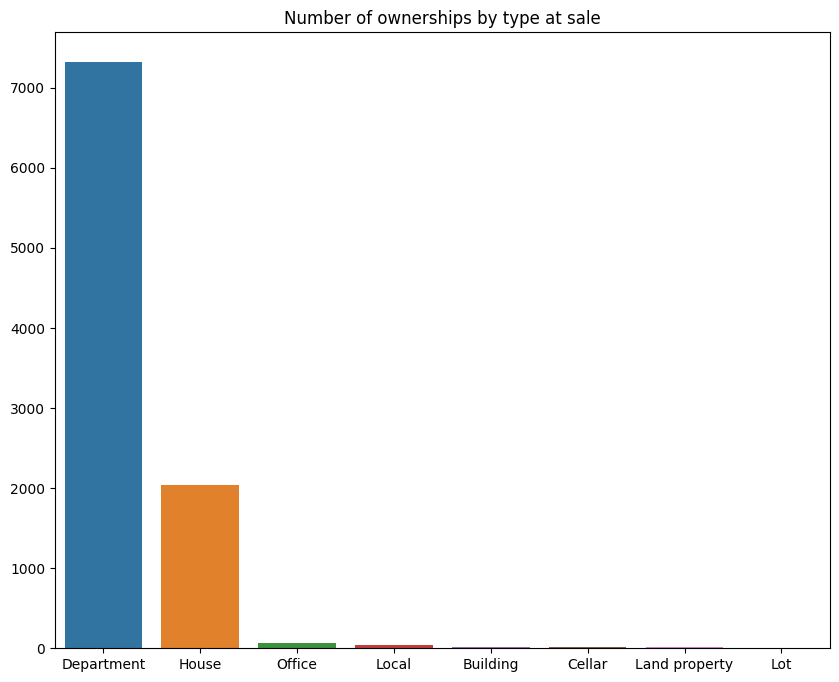

In [401]:

counts=data.Type.value_counts()
print(f"There are {len(counts)} types of ownerships: ")
plt.figure(figsize=((10,8)))
gp=sns.barplot(x=counts.index , y = counts)
gp.set_title("Number of ownerships by type at sale")
gp.set_ylabel("")
plt.show()

### Q2: How many ownerships by neighborhood are in our dataset?

The number of Neighborhoods that we have in our dataset is 149


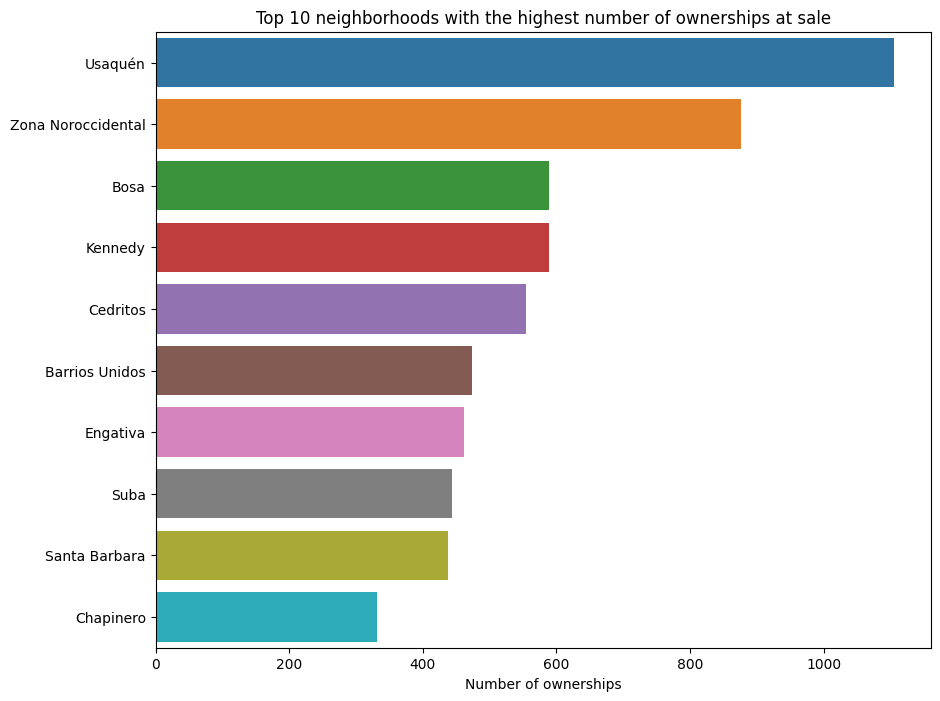

In [402]:
nbh_counts=data.Neighborhood.value_counts()
print(f"The number of Neighborhoods that we have in our dataset is {len(nbh_counts)}")
plt.figure(figsize=((10,8)))
fg=sns.barplot(y=nbh_counts[:10].index, x=nbh_counts[:10])
fg.set_xlabel("Number of ownerships")
fg.set_title("Top 10 neighborhoods with the highest number of ownerships at sale")
plt.show()

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_14516\3807834108.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.num[ind]=(data.Neighborhood[ind], data.Type[ind])


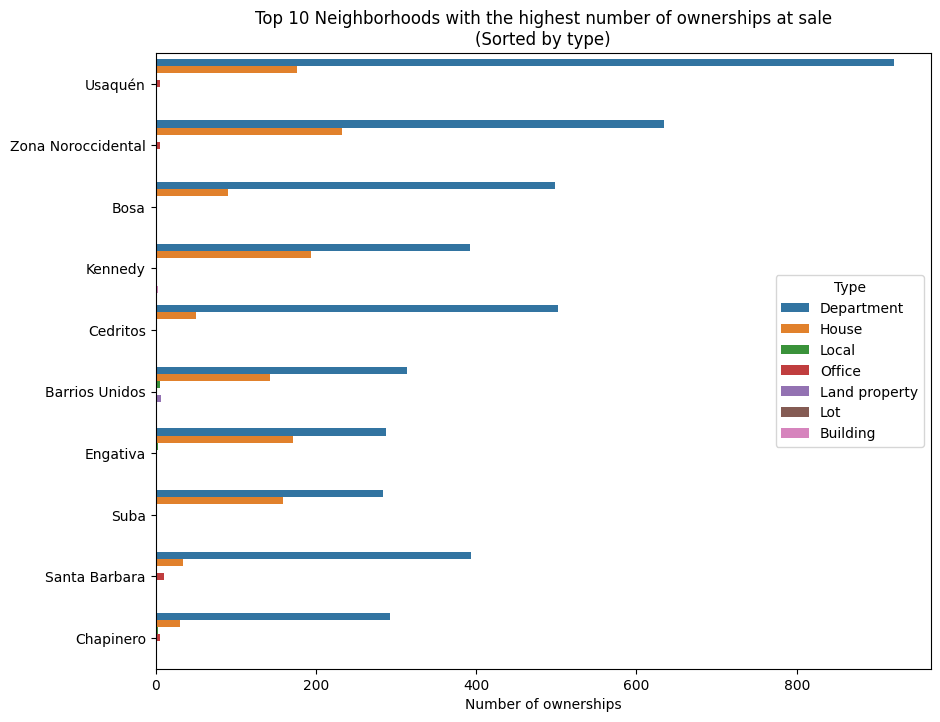

In [403]:
categ=dict(data.value_counts(["Neighborhood", "Type"]))
data["num"]=[0]*len(data)
for ind in data.index: 
    data.num[ind]=(data.Neighborhood[ind], data.Type[ind])
data.num=data.num.map(categ)



top10=nbh_counts[:10].index
plt.figure(figsize=((10,8)))
fg=sns.barplot(data=data.query("Neighborhood in @top10"), x = "num", y="Neighborhood", hue="Type", order=top10)
fg.set_title("Top 10 Neighborhoods with the highest number of ownerships at sale\n(Sorted by type)")
fg.set_xlabel("Number of ownerships")
fg.set_ylabel("")
plt.show()
    

### Q3: Is there any outlayers in the "Bathrooms", "Area" and "Rooms" columns?

#### Boxplot: Rooms by type of onwership

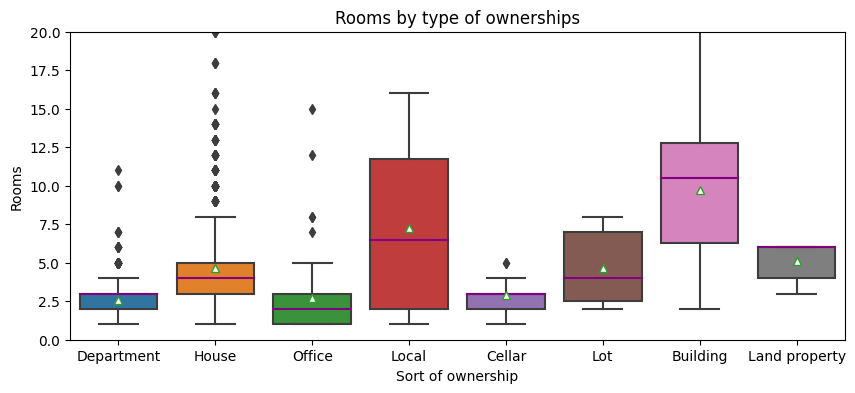

In [404]:
plt.figure(figsize=(10,4))
gp=sns.boxplot(
                data=data,
                x="Type",
                y="Rooms",
                showmeans=True,
                medianprops={
                    "color" : "purple",
                },
                meanprops={
                    "markerfacecolor" : "white",
                }
               
               ) #create a boxplot of rooms divided by sort of ownership 
gp.set_title("Rooms by type of ownerships")
gp.set_xlabel("Sort of ownership")
gp.set_ylim(0,20)
gp.set_ylabel("Rooms")
plt.show()

#### Boxplot: Areas by type of onwership

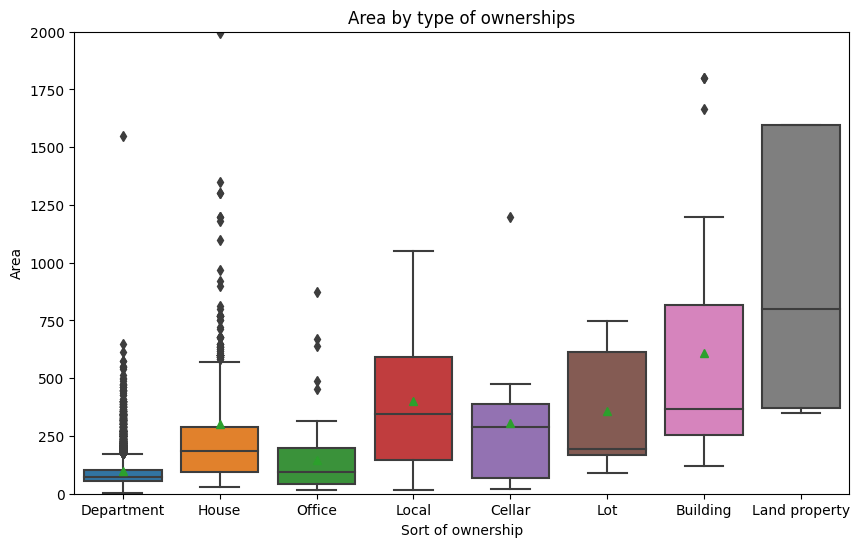

In [405]:
plt.figure(figsize=(10,6))
gp=sns.boxplot(data=data, x="Type",y="Area", showmeans=True) #create a boxplot of rooms divided by sort of ownership 
gp.set_title("Area by type of ownerships")
gp.set_xlabel("Sort of ownership")
gp.set_ylabel("Area")
gp.set_ylim(0,2000)
plt.show()

#### Boxplot: Bathrooms by types of ownership

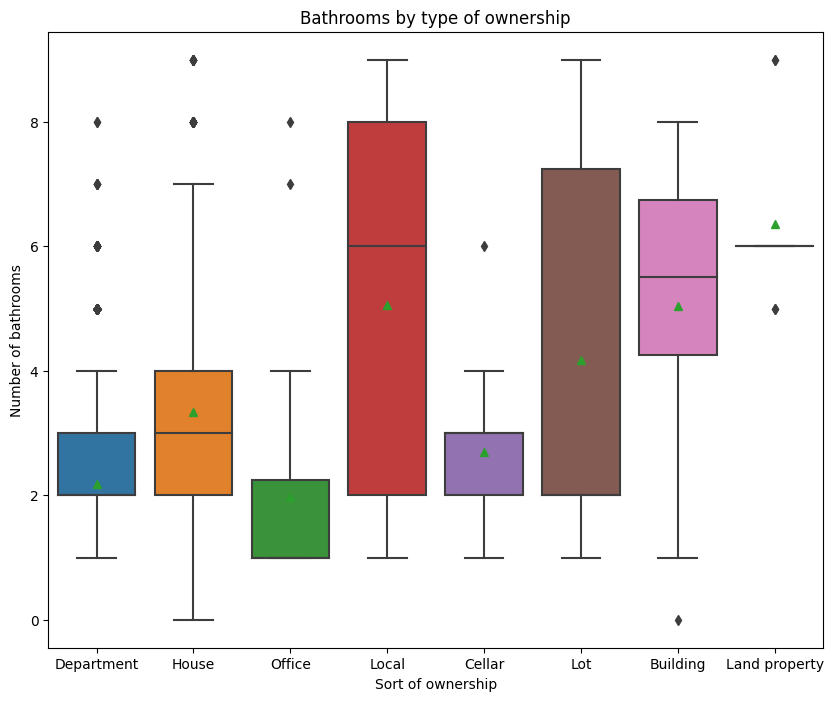

In [406]:
plt.figure(figsize=((10,8)))
fig=sns.boxplot(data=data, x="Type", y="Bathrooms", showmeans=True)
fig.set_title("Bathrooms by type of ownership")
fig.set_xlabel("Sort of ownership")
fig.set_ylabel("Number of bathrooms")
plt.show()

#### *Answering the third question. There are many outlayers of Area and Rooms, especially in departments and houses. Regarding to bathrooms, there are less outlayers, but the curious thing is that for land properties we have at least 5 bathrooms. Also one house and one building have zero bathrooms, so we can conclude it might have an error in those values.*

#### *Would be interesting if we keep those outlayers that are further than the upper whisker for areas, rooms and bathrooms of houses and departments. Moreover, we should remove data with zero bathrooms for houses and buildings, and those with a higher area than 1,000 m2 for houses and departments.*

In [407]:
data_out=data.query("((Area > 1000) & (Type == 'Department' | Type == 'House')) | Bathrooms < 1")
print(f"It will be removed {len(data_out)} columns")
data_out.head()
data.drop(data_out.index, inplace=True)
print(f"Shape of dataset with all outlayers listed removed: {data.shape}")

It will be removed 21 columns
Shape of dataset with all outlayers listed removed: (9499, 10)


### Q4: What is the average cost/m2 for each neighborhood? 

In [408]:
subdata=data.groupby(["Neighborhood","Type"]).aggregate({
    
    "Area": np.sum,
    "cost_millions":np.sum
    
})
subdata["cost_m2_million"]=subdata.cost_millions/subdata.Area
subdata.sort_values("cost_m2_million", ascending=False)
dict_cost_m2_million=dict(subdata.cost_m2_million)
data["cost_m2_million"]=[0]*len(data)
for i in data.index:
    data.cost_m2_million[i] = (data.Neighborhood[i],data.Type[i])
data.cost_m2_million=data.cost_m2_million.map(dict_cost_m2_million)
data.head()



C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_14516\1432339838.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.cost_m2_million[i] = (data.Neighborhood[i],data.Type[i])


,Type,Description,Rooms,Bathrooms,Area,Neighborhood,UPZ,Cost,cost_millions,num,cost_m2_million
0,Department,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.00,635,4.89
1,House,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,670.00,14,3.04
2,Department,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,1120.00,209,8.30
3,Department,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000,890.00,921,6.18
4,Department,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000,970.00,96,6.34


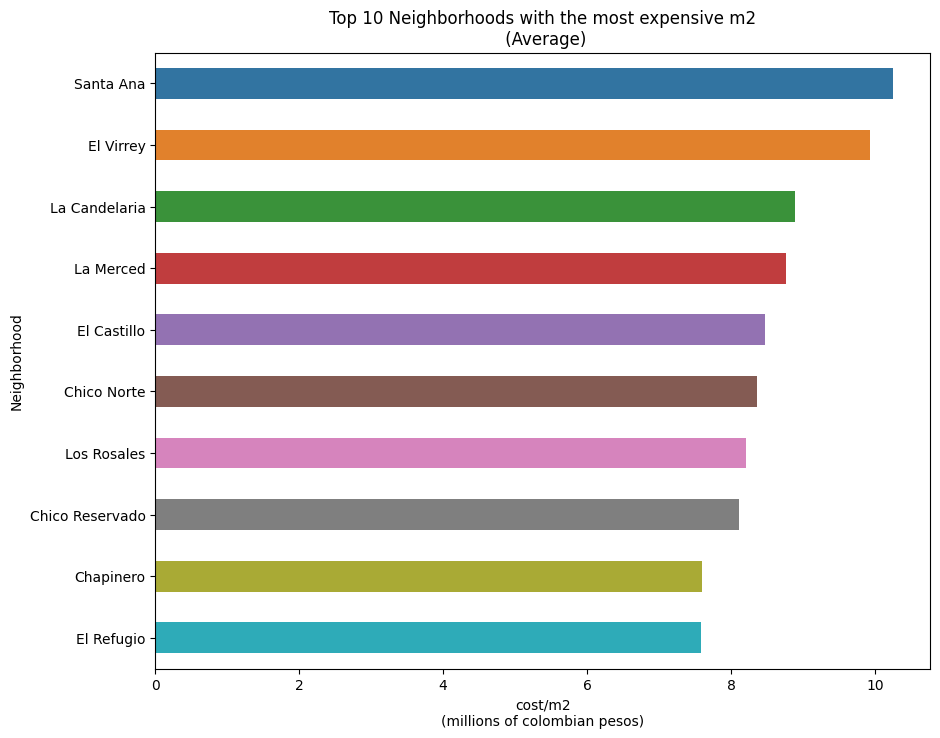

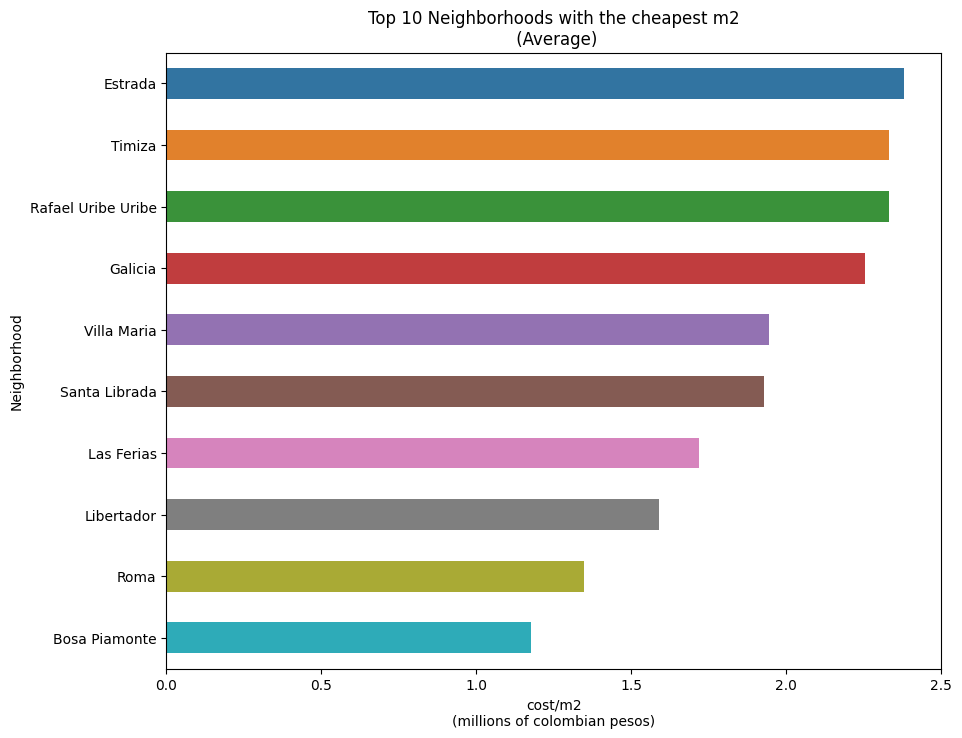

In [409]:
subdata=data.groupby("Neighborhood").aggregate({"Area": np.sum, "cost_millions":np.sum})
subdata["cost/m2/nbh"]=subdata.cost_millions/subdata.Area
subdata.reset_index(drop=False,inplace=True)
subdata.sort_values("cost/m2/nbh", inplace=True,ascending=False)
top10_expensive=subdata.Neighborhood[:10]


# Top 10 most expensive
plt.figure(figsize=((10,8)))
fg=sns.barplot(data=subdata[:10],y="Neighborhood", x="cost/m2/nbh", width=0.5)
fg.set_title("Top 10 Neighborhoods with the most expensive m2\n (Average)")
fg.set_xlabel("cost/m2\n(millions of colombian pesos)")
plt.show()





#Top 10 cheapest
plt.figure(figsize=((10,8)))
fg=sns.barplot(data=subdata[-10:],y="Neighborhood", x="cost/m2/nbh", width=0.5)
fg.set_title("Top 10 Neighborhoods with the cheapest m2\n (Average)")
fg.set_xlabel("cost/m2\n(millions of colombian pesos)")
plt.show()

top10_cheap=subdata.Neighborhood[-10:]

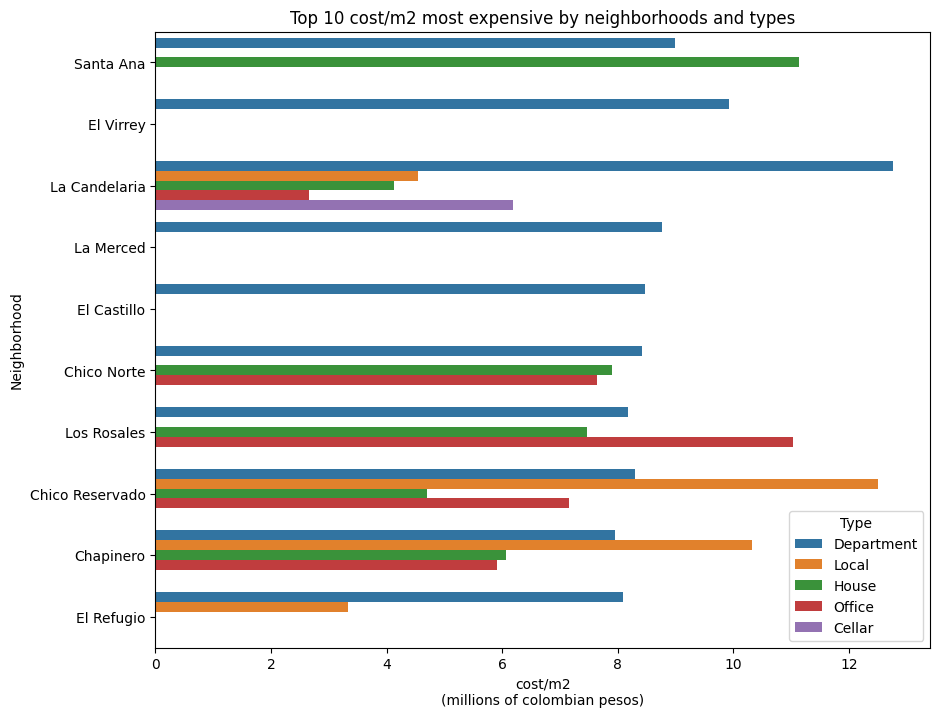

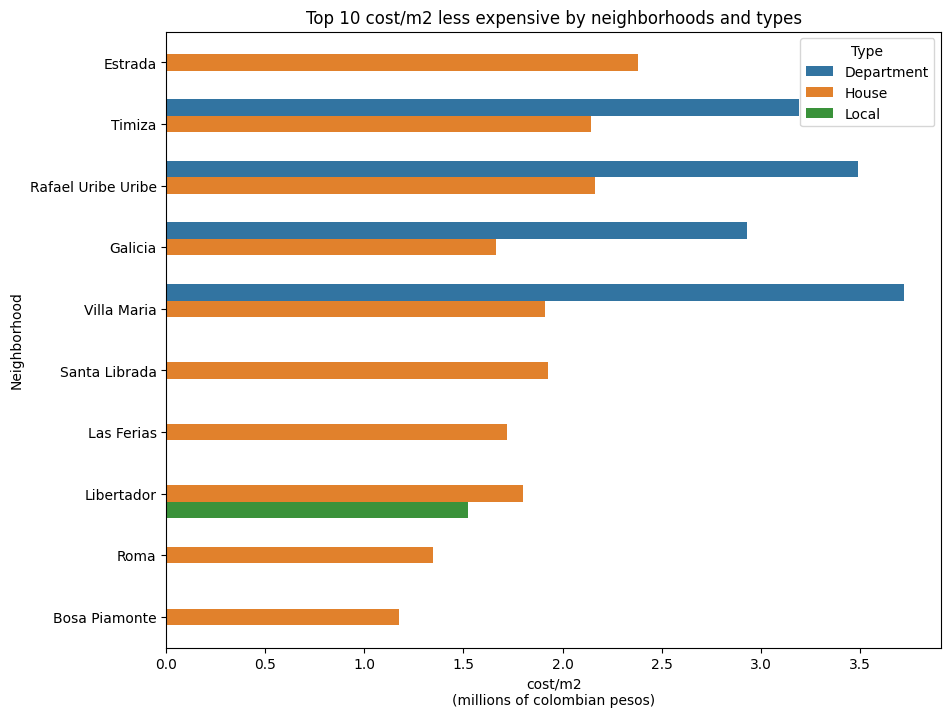

In [410]:
plt.figure(figsize=((10,8)))
fg=sns.barplot(data=data.query("Neighborhood in @top10_expensive"), x="cost_m2_million", y="Neighborhood", hue="Type", order=top10_expensive)
fg.set_xlabel("cost/m2\n(millions of colombian pesos)")
fg.set_title("Top 10 cost/m2 most expensive by neighborhoods and types")
plt.show()



plt.figure(figsize=((10,8)))
fg=sns.barplot(data=data.query("Neighborhood in @top10_cheap"), x="cost_m2_million", y="Neighborhood", hue="Type", order=top10_cheap)
fg.set_xlabel("cost/m2\n(millions of colombian pesos)")
fg.set_title("Top 10 cost/m2 less expensive by neighborhoods and types")

plt.show()

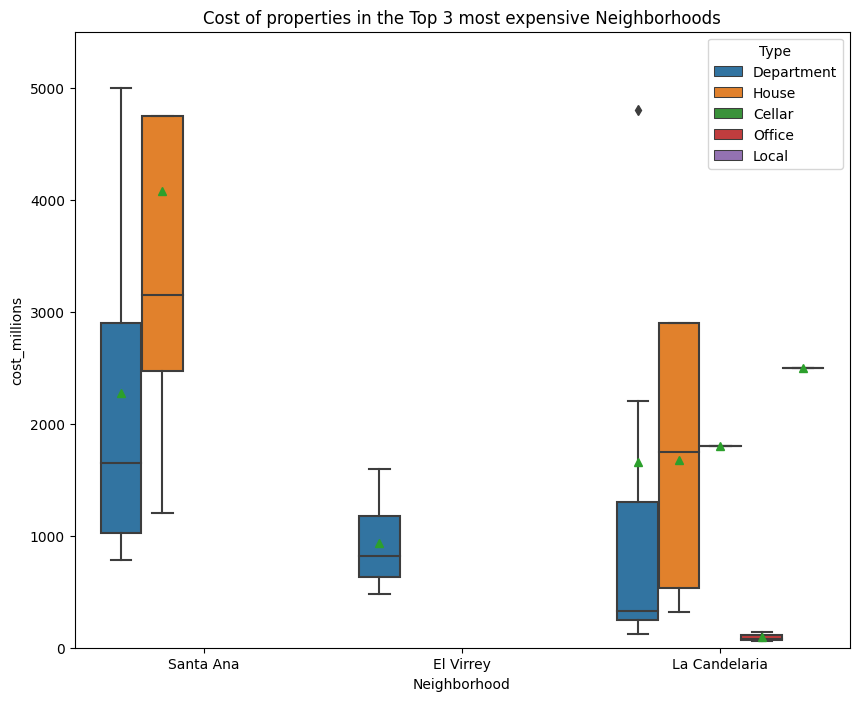

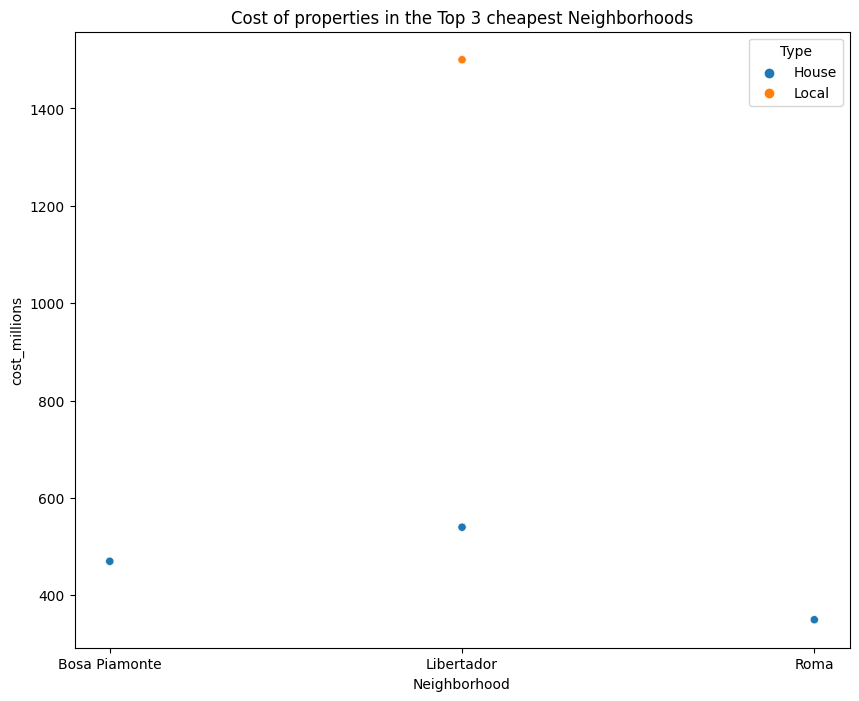

In [411]:
top3_expensive=top10_expensive[:3]
top3_cheap=top10_cheap[-3:]

plt.figure(figsize=((10,8)))
fg=sns.boxplot(data=data.query("Neighborhood in @top3_expensive"), x="Neighborhood", y="cost_millions", hue="Type", order=top3_expensive,showmeans=True)
fg.set_title("Cost of properties in the Top 3 most expensive Neighborhoods")
fg.set_ylim(0,5500)
plt.show()

plt.figure(figsize=((10,8)))
fg=sns.scatterplot(data=data.query("Neighborhood in @top3_cheap"), x="Neighborhood", y="cost_millions", hue="Type")
fg.set_title("Cost of properties in the Top 3 cheapest Neighborhoods")
#fg.set_ylim(0,5500)
plt.show()

Lines drawn alone represents my boxplot. It is because cuartile 1 and 3, or percentil 25 and 75 has the same number, so the box became a line, it's hard to have many ownerships with the same cost, so it might be just one data in each type where I got a line. I will remove those types of ownership

#### *We can notice that the most expensive neighborhoods has a cost/m2 almost 10 times more expensive than the cheapest one. Also the majority of the cheapest neighborhoods sells homes, whereas the expensive ones sells more departments, locals and houses.*

## Adding information from survey "Encuesta Multipropósito Bogotá-Cundinamarca-EM-2021"

In [412]:
data_dane=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3-4\datos_dane.csv")
data_dane.head()

,DIRECTORIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,3004368.00,Usaquén,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.00
1,3004369.00,Usaquén,Usaquén,1,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.00
2,3004375.00,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2,2,2,2,2,2,1,...,2,NaN,NaN,2,2,NaN,NaN,1.00,NaN,11.00
3,3004380.00,Usaquén,Los Cedros,1,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.00
4,3004383.00,Fontibón,Ciudad Salitre Occidental,1,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.00


### Knowing and preparing data for the machine learning model

In [413]:
data_dane.shape

(9857, 55)

In [414]:
data_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DIRECTORIO        9857 non-null   float64
 1   NOMBRE_LOCALIDAD  9857 non-null   object 
 2   NOMBRE_ESTRATO    9857 non-null   object 
 3   NVCBP4            9857 non-null   int64  
 4   NVCBP14A          9857 non-null   int64  
 5   NVCBP14D          9857 non-null   int64  
 6   NVCBP14E          9857 non-null   int64  
 7   NVCBP14G          9857 non-null   int64  
 8   NVCBP15A          9857 non-null   int64  
 9   NVCBP15C          9857 non-null   int64  
 10  NVCBP15F          9857 non-null   int64  
 11  NVCBP15G          9857 non-null   int64  
 12  NVCBP16A3         9857 non-null   int64  
 13  NVCBP16A4         9857 non-null   int64  
 14  NPCKP17           9857 non-null   float64
 15  NPCKP18           9857 non-null   float64
 16  NPCKP23           9558 non-null   float64


The first thing we will do is change the column names

In [415]:
dic_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO', 
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES', 
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES', 
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA', 
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19', 
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA', 
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO', 
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA', 
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO', 
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO', 
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

In [416]:
data_dane.rename(columns=dic_dane,inplace=True)
data_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DIRECTORIO                 9857 non-null   float64
 1   NOMBRE_LOCALIDAD           9857 non-null   object 
 2   NOMBRE_ESTRATO             9857 non-null   object 
 3   CONJUNTO_CERRADO           9857 non-null   int64  
 4   FABRICAS_CERCA             9857 non-null   int64  
 5   TERMINALES_BUS             9857 non-null   int64  
 6   BARES_DISCO                9857 non-null   int64  
 7   OSCURO_PELIGROSO           9857 non-null   int64  
 8   RUIDO                      9857 non-null   int64  
 9   INSEGURIDAD                9857 non-null   int64  
 10  BASURA_INADECUADA          9857 non-null   int64  
 11  INVASION                   9857 non-null   int64  
 12  MOV_ADULTOS_MAYORES        9857 non-null   int64  
 13  MOV_NINOS_BEBES            9857 non-null   int64

Column name "NOMBRE_ESTRATO" has the same categoric values as UPZ column in the dataset we already worked with, so i will group all this data with that column, and then i will ask for the mean values.

In [417]:
data_dane.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean().head()

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,1.89,1.19,1.85,1.89,1.56,1.84,1493859.61,1.16,1.92,1.68,1.80
Américas,1.38,1.25,1.98,1.79,1.61,1.92,2672138.14,1.06,1.97,1.72,1.85
Apogeo,1.65,1.30,1.75,1.94,1.68,2.00,1837583.18,1.08,1.92,1.65,1.92
Arborizadora,1.43,1.30,1.95,1.88,1.69,1.84,1802296.76,1.03,1.88,1.61,1.82
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,1.37,1.33,1.99,1.98,1.70,1.87,2943730.73,1.05,1.95,1.70,1.94


As we can see, the numbers that the survey worked with is not useful for us, so we will change the values into 0 ("No") and 1 ("Yes"). Before, there was 1 ("Yes") and 2 ("No")

In [418]:
data2=data_dane[['NOMBRE_ESTRATO','CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace(2,0)
data2_treated=data2.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()
data2_treated.head()

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,0.11,0.81,0.15,0.11,0.44,0.16,1493859.61,0.84,0.08,0.32,0.20
Américas,0.62,0.75,0.02,0.21,0.39,0.08,2672138.14,0.94,0.03,0.28,0.15
Apogeo,0.35,0.70,0.25,0.06,0.32,0.00,1837583.18,0.92,0.08,0.35,0.08
Arborizadora,0.57,0.70,0.05,0.12,0.31,0.16,1802296.76,0.97,0.12,0.39,0.18
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,0.63,0.67,0.01,0.02,0.30,0.13,2943730.73,0.95,0.05,0.30,0.06


After getting the mean values for all the columns desired, i will merge it with our first dataset called data

### Merging data with data2_treated

In [419]:
data_ml=pd.merge(data,data2_treated, left_on="UPZ", right_on="NOMBRE_ESTRATO", how="left") #Data that will be used for the machine learning model
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9499 entries, 0 to 9498
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      9499 non-null   object 
 1   Description               9499 non-null   object 
 2   Rooms                     9499 non-null   int64  
 3   Bathrooms                 9499 non-null   int64  
 4   Area                      9499 non-null   int64  
 5   Neighborhood              9499 non-null   object 
 6   UPZ                       9457 non-null   object 
 7   Cost                      9499 non-null   object 
 8   cost_millions             9499 non-null   float64
 9   num                       9499 non-null   int64  
 10  cost_m2_million           9499 non-null   float64
 11  CONJUNTO_CERRADO          9345 non-null   float64
 12  INSEGURIDAD               9345 non-null   float64
 13  TERMINALES_BUS            9345 non-null   float64
 14  BARES_DI

For our Machine Learning model, we will use a linear regression, so all columns must be numeric type. In order to do that, we will change the UPZ from object to numeric values

In [420]:
upz=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\Inmersion-datos-aiura-Latam\Inmersion-datos-Aiura-LATAM\Day 3-4\cod_upz.csv")

upz.head()

,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,SANTA FE: Las Nieves + Sagrado Corazón,814.00
1,Santa Isabel,37.00
2,USAQUÉN: Country Club + Santa Bárbara,803.00
3,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Ciudad Salitre Occidental,110.00


In [421]:
upz.shape

(95, 2)

In [422]:
data_ml=pd.merge(data_ml,upz,left_on="UPZ",right_on="NOMBRE_ESTRATO", how="inner") #Inner = Interjection rows of both datasets
data_ml.shape

(9297, 24)

Note that before merging the upz with data_ml we had 9,499 rows, and now we just have 9,297, thats because the upz collected from the survey was less than our original dataset.

In [423]:
data_ml.head()

,Type,Description,Rooms,Bathrooms,Area,Neighborhood,UPZ,Cost,cost_millions,num,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Department,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,360.00,635,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,House,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,300.00,5,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
2,House,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,2519.00,233,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Department,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 239.000.000,239.00,635,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,House,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,1600.00,233,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00


## Creating the model to predict the cost of an owership in Bogota, Colombia

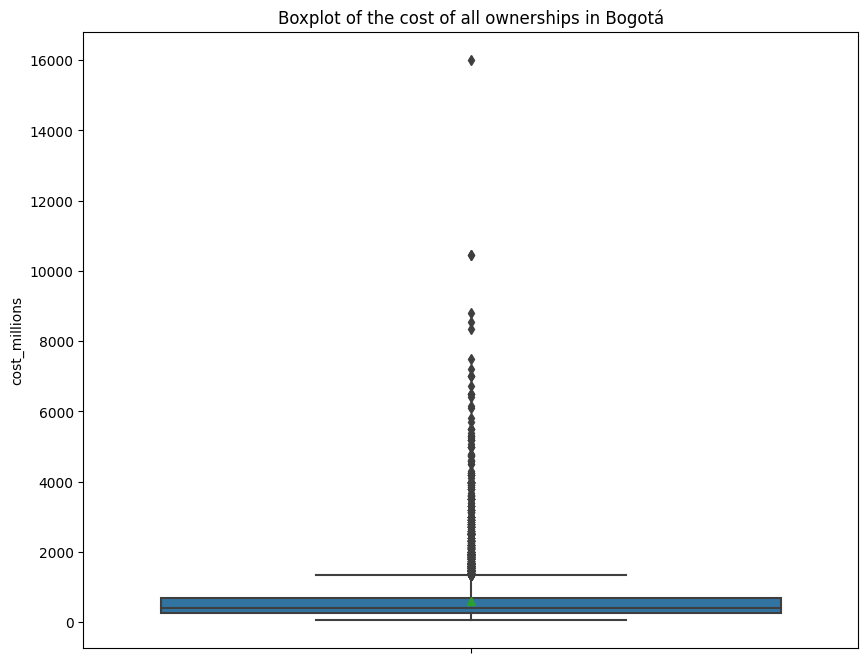

In [424]:
plt.figure(figsize=((10,8)))
fg=sns.boxplot(data=data_ml, y="cost_millions",showmeans=True)
fg.set_title("Boxplot of the cost of all ownerships in Bogotá")
plt.show()

We will take data up to 3000 and below 60 millons

In [425]:
data_ml=data_ml.query("cost_millions < 3000 & cost_millions > 60")
data_ml.shape

(9161, 24)

Maybe is better if we get the annual salary in millions instead of monthly salary

In [426]:
data_ml["ANNUAL_SALARY_MILLIONS"]=data_ml.SALARIO_MES*12/1000000
data_ml.ANNUAL_SALARY_MILLIONS.sample(10)

4682   25.73
474    48.42
6680   17.02
315    48.42
6063   28.98
6232   17.02
282    48.42
8776   28.28
2181   56.05
2893   56.05
Name: ANNUAL_SALARY_MILLIONS, dtype: float64

In [427]:
data_ml.cost_m2_million

0      4.89
1      3.90
2      4.75
3      4.89
4      4.75
       ... 
9292   4.92
9293   4.92
9294   4.92
9295   4.92
9296   4.92
Name: cost_m2_million, Length: 9161, dtype: float64

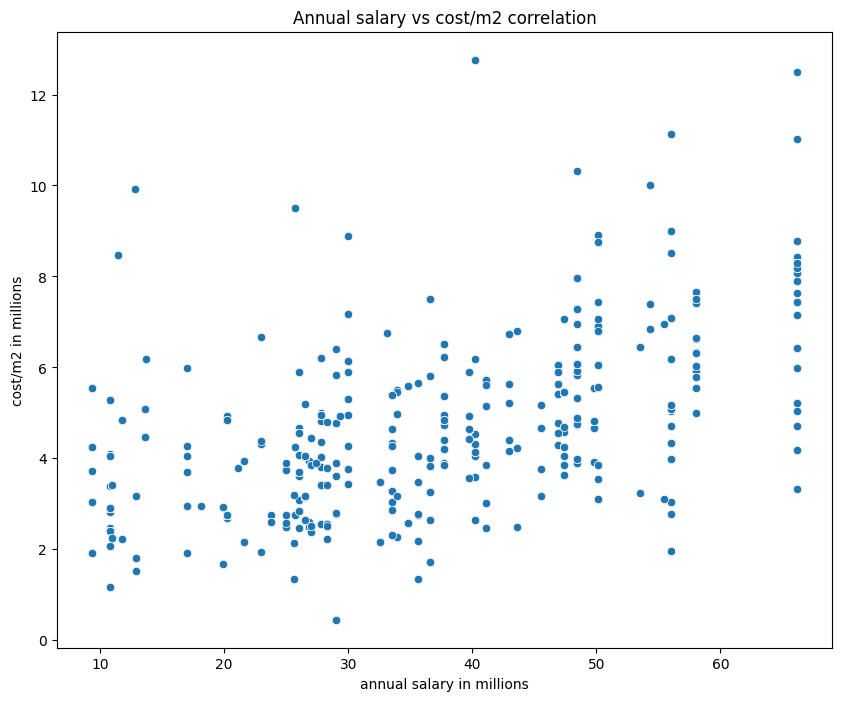

In [432]:
plt.figure(figsize=((10,8)))
gp=sns.scatterplot(data=data_ml, x="ANNUAL_SALARY_MILLIONS", y="cost_m2_million")
gp.set_title("Annual salary vs cost/m2 correlation")
gp.set_ylabel("cost/m2 in millions")
gp.set_xlabel("annual salary in millions")
#plt.ylim(0,20)
plt.show()

At first sight, we can see we have a very low correlation. But would be hard and it would take a long time to do the same for all numeric columns, so we can apply the function df.corr()

In [433]:
data_ml.corr(numeric_only=True) #how all columns are related each other

,Rooms,Bathrooms,Area,cost_millions,num,cost_m2_million,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,ANNUAL_SALARY_MILLIONS
Rooms,1.00,0.48,0.30,0.24,-0.15,-0.27,-0.11,0.12,0.06,0.11,0.13,0.10,-0.15,-0.06,0.06,0.11,0.08,-0.10,-0.15
Bathrooms,0.48,1.00,0.49,0.69,-0.12,0.04,0.16,-0.19,-0.16,-0.09,-0.18,-0.20,0.19,0.12,-0.09,-0.15,-0.09,0.05,0.19
Area,0.30,0.49,1.00,0.46,-0.13,-0.10,0.02,-0.05,-0.05,-0.00,-0.03,-0.05,0.04,0.01,-0.02,-0.03,-0.06,0.01,0.04
cost_millions,0.24,0.69,0.46,1.00,-0.10,0.29,0.23,-0.28,-0.19,-0.12,-0.27,-0.26,0.33,0.13,-0.13,-0.24,-0.17,0.19,0.33
num,-0.15,-0.12,-0.13,-0.10,1.00,0.12,0.28,-0.27,-0.11,-0.10,-0.21,-0.26,0.27,0.23,-0.25,-0.21,0.02,-0.14,0.27
cost_m2_million,-0.27,0.04,-0.10,0.29,0.12,1.00,0.52,-0.60,-0.40,-0.28,-0.58,-0.50,0.73,0.28,-0.30,-0.54,-0.33,0.42,0.73
CONJUNTO_CERRADO,-0.11,0.16,0.02,0.23,0.28,0.52,1.00,-0.84,-0.29,-0.51,-0.70,-0.66,0.80,0.60,-0.35,-0.78,0.05,0.09,0.80
INSEGURIDAD,0.12,-0.19,-0.05,-0.28,-0.27,-0.60,-0.84,1.00,0.50,0.61,0.85,0.75,-0.81,-0.54,0.30,0.74,0.10,-0.01,-0.81
TERMINALES_BUS,0.06,-0.16,-0.05,-0.19,-0.11,-0.40,-0.29,0.50,1.00,0.38,0.66,0.57,-0.51,-0.29,0.17,0.35,0.25,-0.11,-0.51
BARES_DISCO,0.11,-0.09,-0.00,-0.12,-0.10,-0.28,-0.51,0.61,0.38,1.00,0.60,0.51,-0.38,-0.25,-0.02,0.33,-0.05,0.26,-0.38


Also, we can create a heat map for the correlation table as next

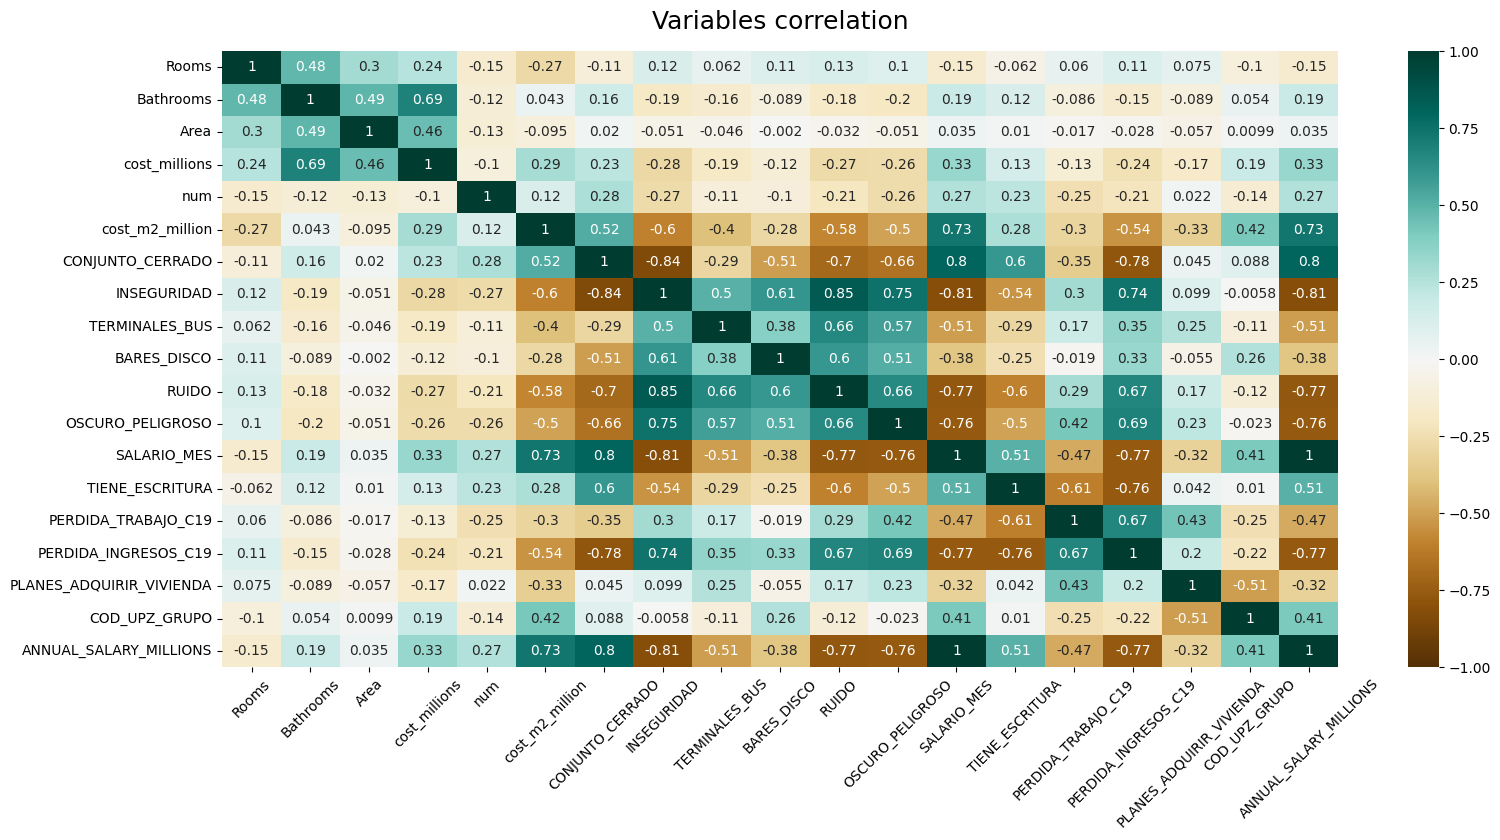

In [435]:
plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(data_ml.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variables correlation', fontdict={'fontsize':18}, pad=16)
heatmap.tick_params(axis="x", rotation=45)

We'll divide our dataset into training and test datasets using scikit-learn to make the aleatory seleccion. So we need to import the next libraries

In [436]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [441]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score

X = data_ml["COD_UPZ_GRUPO"]
y=data_ml["cost_millions"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=99) #random_state = seed
model=LinearRegression()
model.fit(X_train.array.reshape(-1, 1),y_train.array.reshape(-1, 1))

LinearRegression()

Now we will see how accurate our model is. KPI's to see if your model is good

- Mean Absolute Error (MAE)
- R^2

In [443]:
y_predict=model.predict(X_test.array.reshape(-1, 1))
baseline_mae=mean_absolute_error(y_test,y_predict)
baseline_r2=r2_score(y_test,y_predict)

print(f"BAE: {baseline_mae} \t R^2: {baseline_r2}")

BAE: 311.2408140886131 	 R^2: 0.030298992655247492


So we can see that our model is not good enough if we use just one parameter: UPZ, but if we use more columns, maybe our model can be improved

In [448]:
X = data_ml[['COD_UPZ_GRUPO','Rooms','Bathrooms','CONJUNTO_CERRADO','ANNUAL_SALARY_MILLIONS','TIENE_ESCRITURA']] #

Y = data_ml["cost_millions"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_predict_test = model_1.predict(X_test)
y_predict_train = model_1.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

201.711947240344 0.5346647910763427
205.12594498313084 0.5200590930309932


So our model improved, but it still lack of accuracy. That's because we did not separate the different types of ownership, and as we already see, the variability betweeen them is important. 

In [449]:
model_1.predict([[816,3,2,1,50,1]]) #the entered data must be also a dataframem

c:\Users\Emmanuel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([482.37331442])

Our model predicts that an ownership with 

    - UPZ = 816
    - Rooms = 3 
    - Bathrooms = 2
    - Private street (Conjunto cerrado) = 1 = Yes
    - Annual salary in millions = 50
    - House deeds (Tiene escrituras) = 1 = Yes

The ownership would cost 482.37 millions of colombian pesos